In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from func4 import *

# Advection Equation

This code is to initialize a function that uses the advection equation to show the motion of a particle through a "hat" flow field. These are the parameters:

* `D` - particle diameter

In [3]:
def advection(D):
    ##### INITIALIZATION #################################
    c     = 10 # m/s                          # initial gas velocity at spike
    e     = 1 # m/s                           # initial gas velocity elsewhere
    N     = 100                               # number of plot points   
    Niter = 100                               # number of iterations for time
    x     = np.linspace(0,100,N)              #
    dx    = x[1]-x[0]                         # change in x
    dt    = 0.5*dx/c                          # change in t
    rho_g = 1.6 # kg/m^3                      # gas density
    dia_p = D                                 # particle diameter
    A     = np.pi*0.25*dia_p**2               # particle projected area
    rho_p = 2500 # kg/m^3                     # particle density
    M     = rho_p * 1/6 * dia_p**3 * np.pi    # particle mass
    mu    = 2e-5 # kg/ms                      # dynamic viscosity

    # ARRAYS
    Fd_arr = []
    Fd_arr.append(0.0)
    up_arr = []
    up_arr.append(0.0)
    xp_arr = []
    xp_arr.append(50.0)
    ug_arr = []
    ug_arr.append(e)
    t_arr = []
    t_arr.append(0)
    ######################################################

    u = np.ones(N)
    u[0] = e
    u[10:20] = 5

    for j in range(Niter):
        t_arr.append(t_arr[-1] + dt)

        for i in range(N-1):
            uL = u[i]
            uR = u[i+1]
            u[i+1] = (uL*c*dt + uR*(dx - c*dt))/dx

        u[0] = u[N-1]

        ############# PARTICLE SOLVER #############################
        ug_temp = kernel2(xp_arr[-1] , 'p' , u , dx)
        ug_arr.append(ug_temp)

        Re = rho_g * abs(ug_arr[-1] - up_arr[-1]) * dia_p / mu # Reynolds number

        # Cd = Cd_Sternin(0) 
        Cd = Cd_Loth(Re, ug_temp, up_arr[-1], 300, 300, dia_p, rho_g) # Tg = 300 K, Tp = 300 K
        Fd_arr.append(Cd * rho_g * A * abs(ug_temp - up_arr[-1]) * (ug_temp - up_arr[-1]) / 2)

        up_arr.append(up_arr[-1] + Fd_arr[-1] * dt / M)

        xp_arr.append(xp_arr[-1] + up_arr[-1] * dt)
        ###########################################################
    
    return t_arr, up_arr, ug_arr, Fd_arr, xp_arr

# Plots

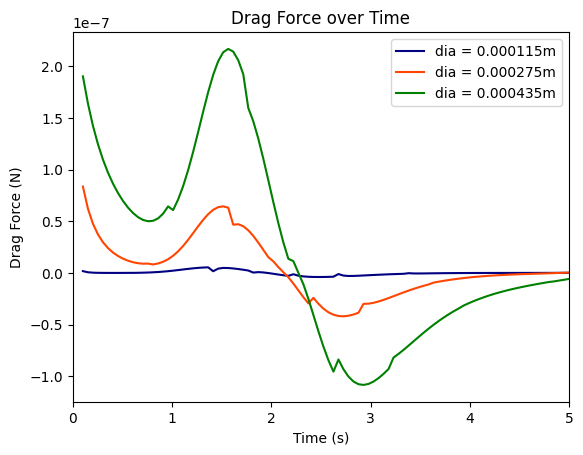

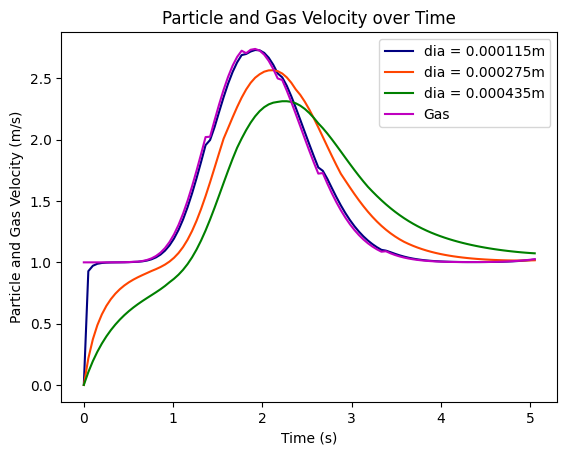

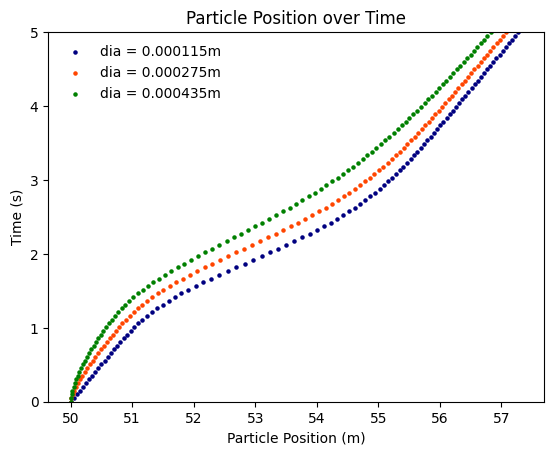

In [11]:
dia_p1 = 115e-6 # m
dia_p2 = 275e-6 # m
dia_p3 = 435e-6 # m

t_arr, up_arr, ug_arr, Fd_arr, xp_arr = advection(dia_p1)
t_arr_2, up_arr_2, ug_arr_2, Fd_arr_2, xp_arr_2 = advection(dia_p2)
t_arr_3, up_arr_3, ug_arr_3, Fd_arr_3, xp_arr_3 = advection(dia_p3)


plt.plot(t_arr[2:], Fd_arr[2:], color = 'navy', label = f'dia = {dia_p1}m')
plt.plot(t_arr_2[2:], Fd_arr_2[2:], color = 'orangered', label = f'dia = {dia_p2}m')
plt.plot(t_arr_3[2:], Fd_arr_3[2:], color = 'g', label = f'dia = {dia_p3}m')
plt.title('Drag Force over Time')
plt.ylabel('Drag Force (N)')
plt.xlabel('Time (s)')
plt.legend()
#plt.grid()
plt.xlim(0,5)
plt.show()

plt.plot(t_arr, up_arr, color = 'navy', label = f'dia = {dia_p1}m')
plt.plot(t_arr_2, up_arr_2, color = 'orangered', label = f'dia = {dia_p2}m')
plt.plot(t_arr_3, up_arr_3, color = 'g', label = f'dia = {dia_p3}m')
plt.plot(t_arr, ug_arr, color = 'm', label = 'Gas')
plt.title('Particle and Gas Velocity over Time')
plt.ylabel('Particle and Gas Velocity (m/s)')
plt.xlabel('Time (s)')
plt.legend()
#plt.grid()
plt.show()

point_size = 5

plt.scatter(xp_arr, t_arr, s = point_size, color = 'navy', label = f'dia = {dia_p1}m')
plt.scatter(xp_arr_2, t_arr_2, s = point_size, color = 'orangered', label = f'dia = {dia_p2}m')
plt.scatter(xp_arr_3, t_arr_3, s = point_size, color = 'g', label = f'dia = {dia_p3}m')
plt.title('Particle Position over Time')
plt.ylabel('Time (s)')
plt.xlabel('Particle Position (m)')
plt.legend(frameon=False)
#plt.grid()
plt.ylim(0,5)
plt.show()

# Animations

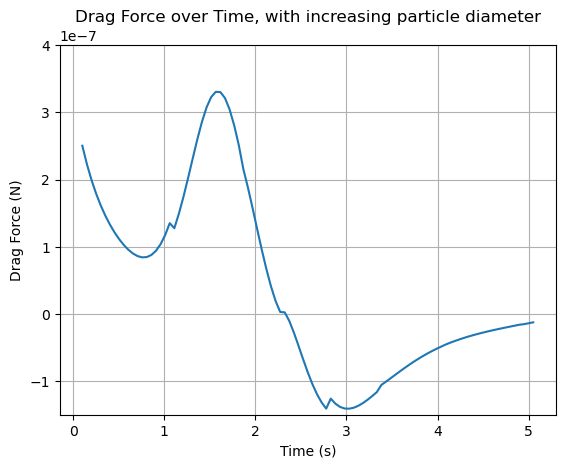

In [29]:
fig, ax = plt.subplots()

dia_p1 = 115e-6 # m

t_arr, up_arr, ug_arr, Fd_arr, xp_arr = advection(dia_p1)

u, = ax.plot(t_arr[2:], Fd_arr[2:])

def animate(i):
    t_arr, up_arr, ug_arr, Fd_arr, xp_arr = advection(dia_p1 + i * 2e-6) 
    vals = Fd_arr[2:]
    
    u.set_ydata(vals)  # update the data.
    return u,

ani = animation.FuncAnimation(fig, animate, interval=25, blit=True, save_count=200)

plt.title('Drag Force over Time, changing with particle diameter')
plt.ylabel('Drag Force (N)')
plt.xlabel('Time (s)')
plt.ylim([-1.5e-7, 4e-7])
plt.grid()

writergif = animation.PillowWriter(fps=30)
ani.save('drag_force4.gif', writer = writergif)

In [ ]:
fig, ax = plt.subplots()

dia_p1 = 115e-6 # m

t_arr, up_arr, ug_arr, Fd_arr, xp_arr = advection(dia_p1)

u, = ax.plot(t_arr, up_arr, label = 'Particle Velocity')
v, = ax.plot(t_arr, ug_arr, label = 'Gas Velocity')

def animate(i):
    t_arr, up_arr, ug_arr, Fd_arr, xp_arr = advection(dia_p1 + i * 2e-6) 
    vals = up_arr
    
    u.set_ydata(vals)  # update the data.
    return u, v,

ani = animation.FuncAnimation(fig, animate, interval=25, blit=True, save_count=200)

plt.title('Particle Velocity over Time, with increasing particle diameter')
plt.ylabel('Particle Velocity (m/s)')
plt.xlabel('Time (s)')
plt.grid()

writergif = animation.PillowWriter(fps=30)
ani.save('particle_velocity4.gif', writer = writergif)

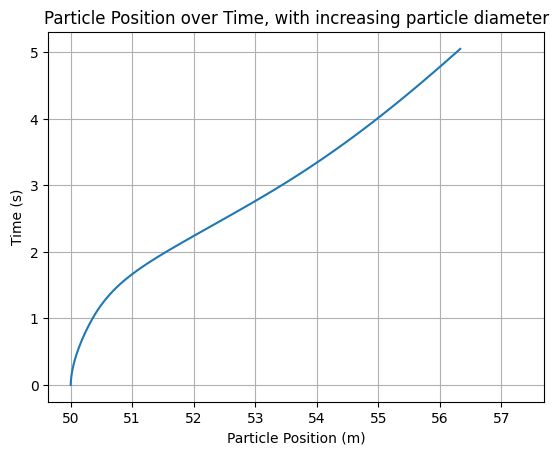

In [6]:
fig, ax = plt.subplots()

dia_p1 = 115e-6 # m

t_arr, up_arr, ug_arr, Fd_arr, xp_arr = advection(dia_p1)

u, = ax.plot(xp_arr, t_arr)

def animate(i):
    t_arr, up_arr, ug_arr, Fd_arr, xp_arr = advection(dia_p1 + i * 3e-6) 
    vals = xp_arr
    
    u.set_xdata(vals)  # update the data.
    return u,

ani = animation.FuncAnimation(fig, animate, interval=25, blit=True, save_count=200)

plt.title('Particle Position over Time, with increasing particle diameter')
plt.ylabel('Time (s)')
plt.xlabel('Particle Position (m)')
plt.grid()

writergif = animation.PillowWriter(fps=30)
ani.save('particle_position4.gif', writer = writergif)